<div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
             height : 1.1cm
    ">
  <h1 style="font-family: 'Calibri', sans-serif; text-align: center; color: white ; font-size: 35px; margin-top: 0; margin-bottom: 20px; font-weight: bold">
        Exercise 9 : Hyperparameter Tuning
    </h1>
</div>

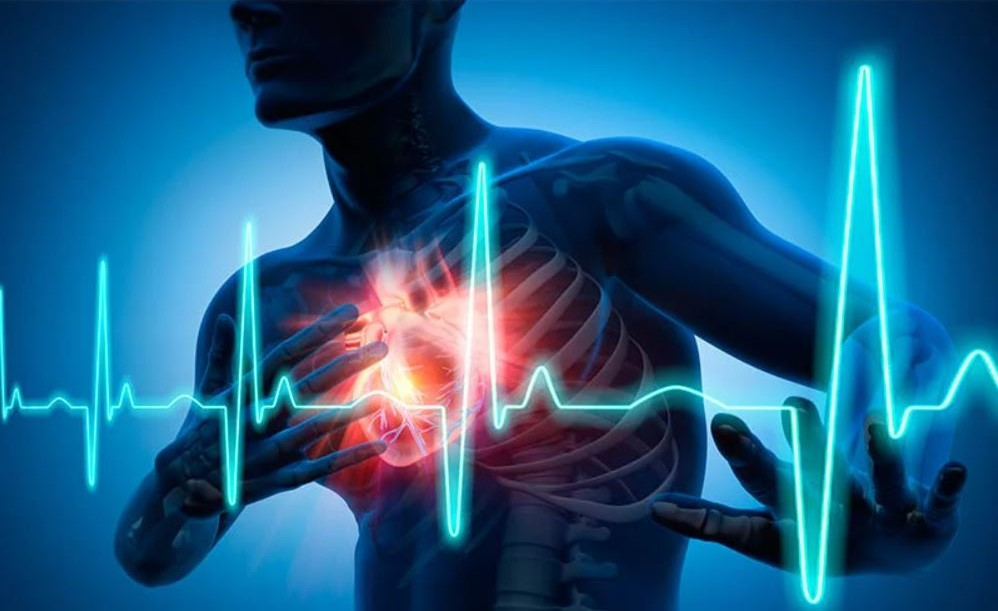

 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
Data Description
    </h1>
</div>

<div style="background-color: #ADDFFF; text-align: left; border-radius: 10px; margin: 5px; padding: 10px;">
  <body style="color: white; font-size: 20px;"> 
<b>1- Age:</b> Age (in years)<br>
<b>2- Sex:</b> gender (1 = male; 0 = female) <br>
<b>3.ChestPain:</b> Chest Pain type -- 1: typical angina (all criteria present) -- 2: atypical angina (two of three criteria satisfied) -- 3: non-anginal pain (less than one criteria satisfied) – 4: asymptomatic (none of the criteria are satisfied)<br> 
<b>4. Restbps:</b> Resting Blood pressure (in mmHg, upon admission to the hospital) <br>
<b>5. Chol:</b> serum cholesterol in mg/dL <br>
<b>6. Fbs:</b> fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false <br>
<b>7. RestECG:</b> Resting electrocardiogram results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
<b>8. MaxHR:</b> Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise. <br>
<b>9.Exang:</b> exercise induced angina (1 = yes; 0 = no) <br>
<b>10. Oldpeak:</b> ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)<br>
<b>11. Slope:</b> the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping <br>
<b>12.Ca:</b> number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue). <br>
<b>13. thal:</b> 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test) <br>

  </body>
</div>


 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
    Importing Libriries
  </h1>
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
Loading Data  </h1>
</div>

In [3]:
data = pd.read_csv('heart.csv')

 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
Data Understanding  </h1>
</div>

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum().sum()

0

In [9]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: title={'center': 'Correlation Matrix'}>

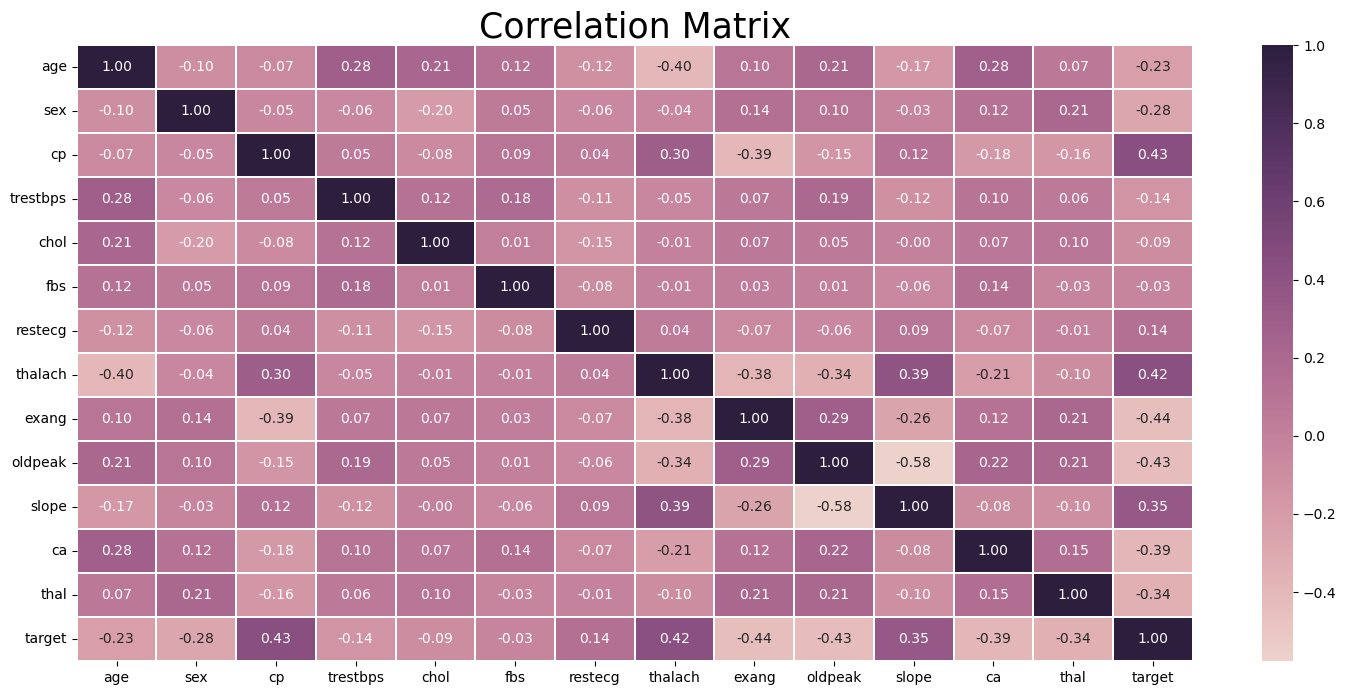

In [11]:
plt.figure(figsize=(18,8))
plt.title('Correlation Matrix', fontsize=25)
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", linewidth=.3, cmap=sns.cubehelix_palette(as_cmap=True))

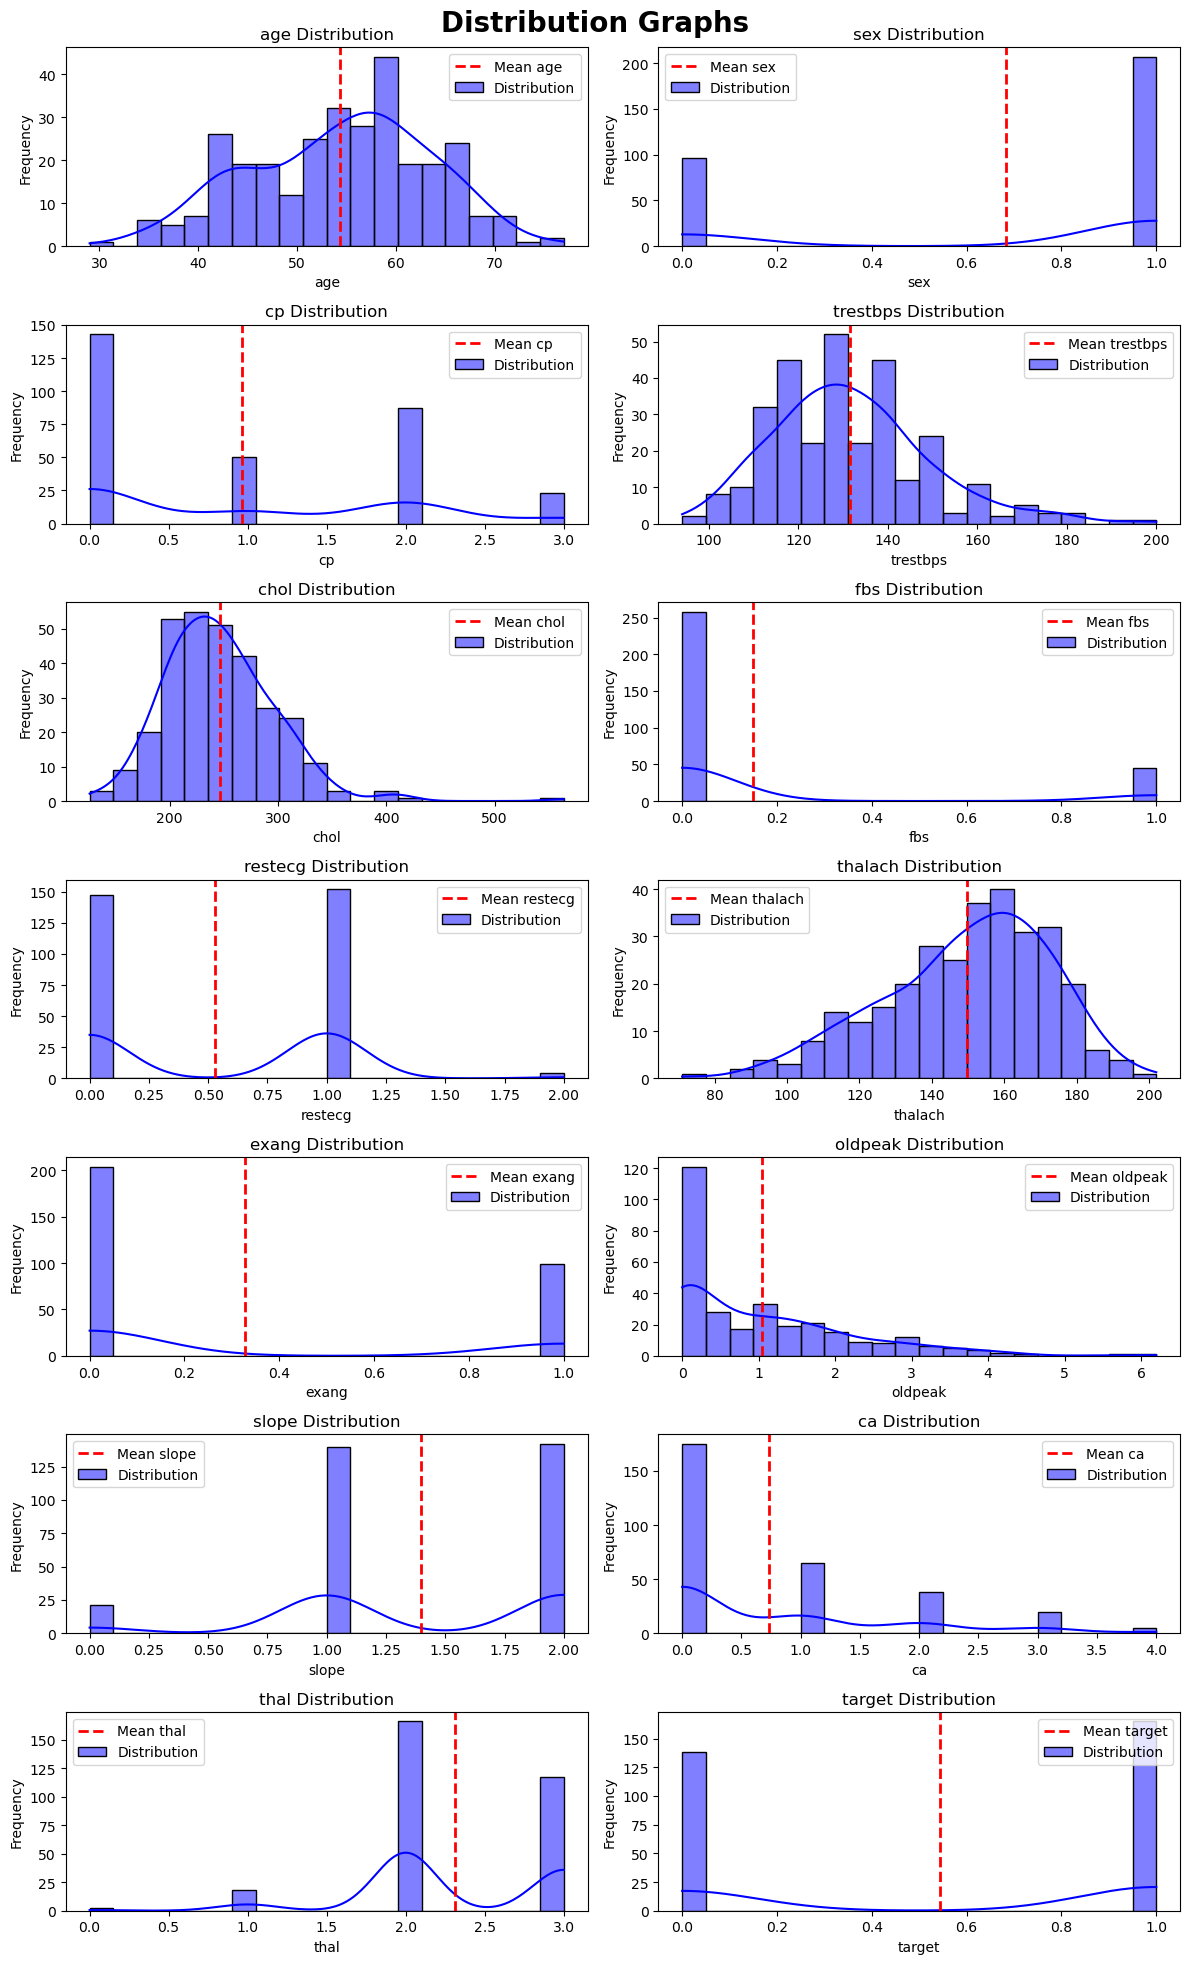

In [12]:
cols = data.columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 20))
axes = axes.flatten()  

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(data[col], bins=20, kde=True, color='blue', ax=ax, label='Distribution')
    
    mean_value = data[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=('Mean ' + col))
    
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.set_title(col + ' Distribution')

fig.suptitle('Distribution Graphs', fontsize=20, fontweight='bold');
plt.tight_layout()
plt.show()


 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
Preproccesing  </h1>
</div>

# Outlier Detection :

<div style="background-color: #ADDFFF; text-align: left; border-radius: 10px; margin: 5px; padding: 10px;">
  <body style="color: white; font-size: 20px;"> 
      Given the small number of data points, instead of removing outlier data, we replace them with the upper and lower fence values.
      </body>
      </div>

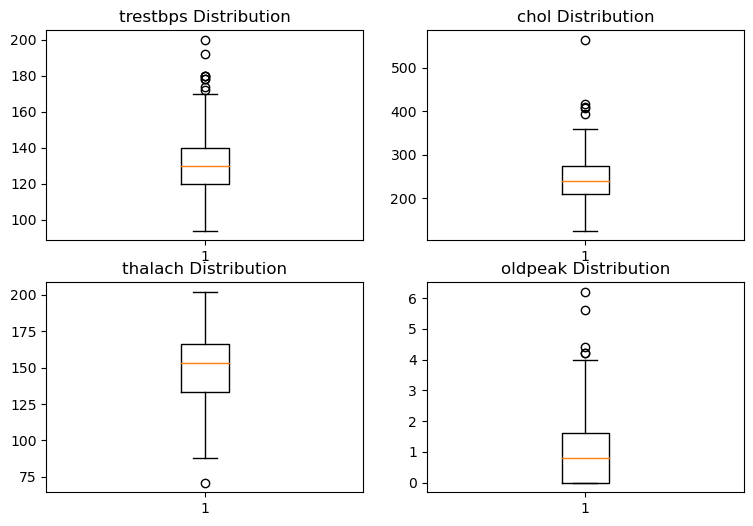

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
ax1.boxplot(data['trestbps'], showfliers=True)
ax2.boxplot(data['chol'], showfliers=True)
ax3.boxplot(data['thalach'], showfliers=True)
ax4.boxplot(data['oldpeak'], showfliers=True)

ax1.set(title='trestbps Distribution');
ax2.set(title='chol Distribution');
ax3.set(title='thalach Distribution');
ax4.set(title='oldpeak Distribution');


In [14]:
##################### Replace Outliers With Upper/Lower Fence ########################

columns = ['trestbps','oldpeak', 'chol', 'thalach']

for column in columns:
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    data.loc[data[column] > upper_fence, column] = upper_fence
    data.loc[data[column] < lower_fence, column] = lower_fence

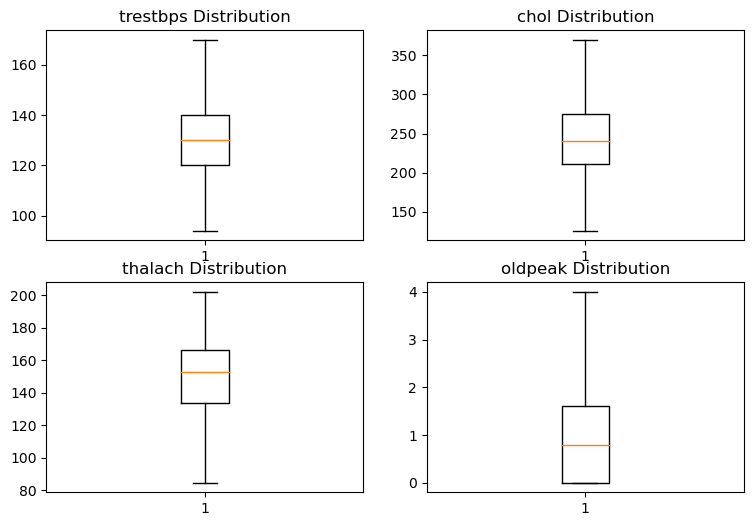

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
ax1.boxplot(data['trestbps'], showfliers=True)
ax2.boxplot(data['chol'], showfliers=True)
ax3.boxplot(data['thalach'], showfliers=True)
ax4.boxplot(data['oldpeak'], showfliers=True)

ax1.set(title='trestbps Distribution');
ax2.set(title='chol Distribution');
ax3.set(title='thalach Distribution');
ax4.set(title='oldpeak Distribution');

# Split Features and target :

In [16]:
X = data.drop(['target'],axis=1)
y = data[['target']]

# Scaling :

In [17]:
cols = ["age","trestbps","chol","thalach","oldpeak"]

ss = StandardScaler()
X[cols] = ss.fit_transform(X[cols])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,1,3,0.828728,-0.255601,1,0,0.013543,0,1.150938,0,0,1
1,-1.915313,1,2,-0.077351,0.102487,0,1,1.641748,0,2.233684,0,0,2
2,-1.474158,0,1,-0.077351,-0.866457,0,0,0.981665,0,0.338879,2,0,2
3,0.180175,1,1,-0.681403,-0.192409,0,1,1.245698,0,-0.202494,2,0,2
4,0.290464,0,0,-0.681403,2.293143,0,1,0.585615,1,-0.382951,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.526702,-0.087089,0,1,-1.174607,1,-0.743867,1,0,3
299,-1.033002,1,3,-1.285455,0.397383,0,1,-0.778557,0,0.158422,1,0,3
300,1.503641,1,0,0.768323,-1.098161,1,1,-0.382507,0,2.143455,1,2,3
301,0.290464,1,0,-0.077351,-2.404128,0,1,-1.526651,1,0.158422,1,1,3


# OHE :

In [18]:
encoder = OneHotEncoder()

ct = ColumnTransformer(
    transformers=[
        ('sex', encoder, [1]),
        ('cp', encoder, [2]),
        ('fbs', encoder, [5]),
        ('restecg', encoder, [6]),
        ('exang', encoder, [8]),
        ('slope', encoder, [10]),
        ('ca', encoder, [11]),
        ('thal', encoder, [12]),
    ],
    remainder='passthrough'
)

X = ct.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ..., -0.2556008 ,
         0.01354296,  1.15093843],
       [ 0.        ,  1.        ,  0.        , ...,  0.10248711,
         1.64174792,  2.23368413],
       [ 1.        ,  0.        ,  0.        , ..., -0.86645666,
         0.98166483,  0.33887916],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -1.09816061,
        -0.3825069 ,  2.14345532],
       [ 0.        ,  1.        ,  1.        , ..., -2.4041283 ,
        -1.52665092,  0.15842154],
       [ 1.        ,  0.        ,  0.        , ..., -0.19240882,
         1.06967591, -0.92432416]])

In [19]:
y = np.ravel(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
Splitting Train & Test Data </h1>
</div>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

 <div style= "background-color: #1F45FC;
              text-align: center;
              justify-content: fad;
              align-items: center;
              border-radius: 10px;
    ">
  <h1 style="color: white"> 
Modeling & Hyperparamet Tuning </h1>
</div>

# Define Diffrent Parameters & Algorithms :

In [21]:
################################ Selected Parameters For SVM #################################
SVC_params = {
    'C': np.arange(1, 10, 1),
    'gamma': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
}
######################### Selected Parameters For Decision Tree ##############################
dt_params = {
    'criterion': ['gini'],
    'splitter': ['best', 'random'],
    'max_depth': [7, 10, 15, 23],
    'min_samples_split': [10, 45, 56, 78, 98],
    'min_samples_leaf': [3, 25, 27, 32, 47, 67, 73],
    'random_state': [1, 14, 42, 44, 61, 95, 108]
}
################################# Selected Parameters For KNN ################################
Knn_params = {
    'n_neighbors': np.arange(1, 20, 1),
    'leaf_size': np.arange(1, 20, 1),
    'p': np.arange(1, 10, 1)
}
######################### Selected Parameters For Random Forest ##############################
rf_params = {
    'n_estimators': np.arange(1, 100, 5),
    'min_samples_split': np.arange(1, 20, 1),
}
############################ Selected Parameters For Adaboost ################################
ada_params = {
    'n_estimators': np.arange(1, 100, 10),
    'learning_rate': np.arange(0, 3, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Grid Search ( F1) :

In [22]:
################################# Finding Best Parameters For Each Algorithm ######################################

parameters = [SVC_params, dt_params, Knn_params, rf_params, ada_params]
estimators = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier()]
best_F1_params = []

for i in range(len(parameters)):
    param_dict = parameters[i]
    estimator = estimators[i]
    
        
    gsh = GridSearchCV(estimator, param_grid=param_dict, scoring='f1_macro', cv=3, n_jobs=-1, verbose=10)
    gsh.fit(X_train, y_train) 
    best_F1_params.append(gsh.best_params_)

    print(f"Best parameters for {estimators[i]}: {gsh.best_params_}")
    print(f"Best Score for {estimators[i]}: {gsh.best_score_}")
    print('\n----------------------------------------------------------------------------------------------------------\n')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for SVC(): {'C': 7, 'gamma': 0.001}
Best Score for SVC(): 0.8218200359734339

----------------------------------------------------------------------------------------------------------

Fitting 3 folds for each of 1960 candidates, totalling 5880 fits
Best parameters for DecisionTreeClassifier(): {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 95, 'splitter': 'random'}
Best Score for DecisionTreeClassifier(): 0.8102986488219179

----------------------------------------------------------------------------------------------------------

Fitting 3 folds for each of 3249 candidates, totalling 9747 fits
Best parameters for KNeighborsClassifier(): {'leaf_size': 1, 'n_neighbors': 10, 'p': 1}
Best Score for KNeighborsClassifier(): 0.8264692811238069

----------------------------------------------------------------------------------------------------------

Fitting

# Checking Each Algorithm Using Best Parameters (F1) :

In [23]:
Alg = [SVC, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier, AdaBoostClassifier]

for i in range(len(Alg)):
    clf = Alg[i](**best_F1_params[i])   
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_name = str(estimators[i]).split('.')[-1][:-2] 
    print(' =======================================================')
    print(f"  Results for {model_name}:\n{best_F1_params[i]}")
    print(' =======================================================')
    print(metrics.classification_report(y_test, y_pred))
    print(" =======================================================\n\n\n")


  Results for SVC:
{'C': 7, 'gamma': 0.001}
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76




  Results for DecisionTreeClassifier:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 10, 'random_state': 95, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.86      0.76      0.81        41

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76




  Results for KNeighborsClassifier:
{'leaf_size': 1, 'n_neighbors': 10, 'p': 1}
              precision    recall  f1-score   supp

# Grid Search (Recall 1) :

In [24]:
################################# Finding Best Parameters For Each Algorithm ######################################

parameters = [SVC_params, dt_params, Knn_params, rf_params, ada_params]
estimators = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier()]
scorer = make_scorer(recall_score, pos_label=1)

best_recall1_params = []

for i in range(len(parameters)):
    param_dict = parameters[i]
    estimator = estimators[i]
   
        
    gsh = GridSearchCV(estimator, param_grid=param_dict, scoring=scorer, cv=3, n_jobs=-1, verbose=10)
    gsh.fit(X_train, y_train) 
    best_recall1_params.append(gsh.best_params_)

    print(f"Best parameters for {estimators[i]}: {gsh.best_params_}")
    print(f"Best Score for {estimators[i]}: {gsh.best_score_}")
    print('\n----------------------------------------------------------------------------------------------------------\n')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for SVC(): {'C': 1, 'gamma': 1e-05}
Best Score for SVC(): 1.0

----------------------------------------------------------------------------------------------------------

Fitting 3 folds for each of 1960 candidates, totalling 5880 fits
Best parameters for DecisionTreeClassifier(): {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 73, 'min_samples_split': 10, 'random_state': 1, 'splitter': 'random'}
Best Score for DecisionTreeClassifier(): 0.9206349206349206

----------------------------------------------------------------------------------------------------------

Fitting 3 folds for each of 3249 candidates, totalling 9747 fits
Best parameters for KNeighborsClassifier(): {'leaf_size': 1, 'n_neighbors': 7, 'p': 2}
Best Score for KNeighborsClassifier(): 0.8867595818815331

----------------------------------------------------------------------------------------------------------

Fitting 3 folds for eac

# Checking Each Algorithm Using Best Parameters (recall 1) :

In [25]:
Alg = [SVC, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier, AdaBoostClassifier]

for i in range(len(Alg)):
    clf = Alg[i](**best_recall1_params[i])   
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    model_name = str(estimators[i]).split('.')[-1][:-2] 
    print(' =======================================================')
    print(f"  Results for {model_name}:\n{best_recall1_params[i]}")
    print(' =======================================================')
    print(metrics.classification_report(y_test, y_pred))
    print(" =======================================================\n\n\n")


  Results for SVC:
{'C': 1, 'gamma': 1e-05}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.54      1.00      0.70        41

    accuracy                           0.54        76
   macro avg       0.27      0.50      0.35        76
weighted avg       0.29      0.54      0.38        76




  Results for DecisionTreeClassifier:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 73, 'min_samples_split': 10, 'random_state': 1, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.82      0.80      0.81        41

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76




  Results for KNeighborsClassifier:
{'leaf_size': 1, 'n_neighbors': 7, 'p': 2}
              precision    recall  f1-score   suppo